In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import pywt
from PIL import Image  
import PIL  
from skimage.io import imsave, imread

In [3]:
from dask import bag, diagnostics 
#import hvplot.pandas
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
import shutil

import cv2
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay, zero_one_loss, classification_report
import seaborn as sns
from tensorflow import keras
import matplotlib.cm as cm
from IPython.display import Image, display

from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from keras.layers import Input
from keras.layers import Convolution2D , concatenate ,Conv2D,Dense
from keras.layers import Activation,Dropout, GlobalAveragePooling2D,MaxPooling2D
from keras.models import Model
from keras.optimizers import Adam ,SGD,RMSprop

In [5]:
import math
from keras.layers import MaxPool2D, concatenate, AveragePooling2D
import tensorflow as tf
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras import layers
from tensorflow.keras.callbacks import ModelCheckpoint
import h5py
from keras.layers import Concatenate
import keras.backend as K
import keras
from keras.utils import np_utils
from keras.callbacks import LearningRateScheduler

In [6]:
import torch

device = torch.device("cuda:0" if (torch.cuda.is_available()) else "cpu")
print(device)

cuda:0


In [134]:
data_path = '/content/drive/MyDrive/Sem 2/CV/Sensors_data/Humidity'

In [135]:
classes = list(os.listdir('/content/drive/MyDrive/Sem 2/CV/Sensors_data/Humidity/'))
print(classes)

['Winter', 'Summer', 'Spring', 'Autumn']


In [136]:
directories = {
    'Winter': '/content/drive/MyDrive/Sem 2/CV/Sensors_data/Humidity/Winter/',
    'Spring': '/content/drive/MyDrive/Sem 2/CV/Sensors_data/Humidity/Spring/',
    'Autumn': '/content/drive/MyDrive/Sem 2/CV/Sensors_data/Humidity/Autumn/',
    'Summer': '/content/drive/MyDrive/Sem 2/CV/Sensors_data/Humidity/Summer/',}

In [120]:
# get image dimensions
def get_dims(file):
    img = cv2.imread(file)
    h,w = img.shape[:2]
    return h,w

100
[########################################] | 100% Completed | 33.50 s
76
[########################################] | 100% Completed | 36.06 s
66
[########################################] | 100% Completed | 31.75 s
100
[########################################] | 100% Completed | 3.71 s


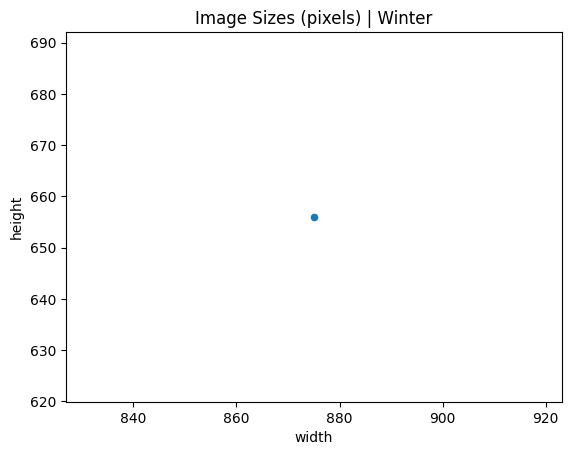

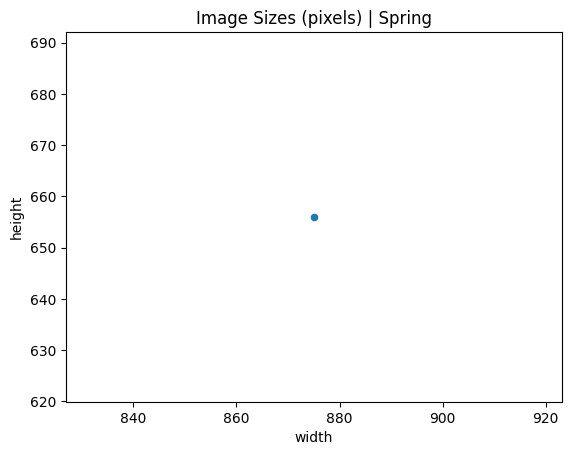

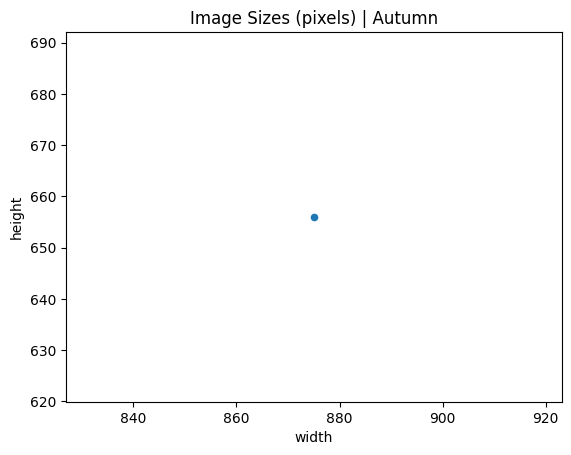

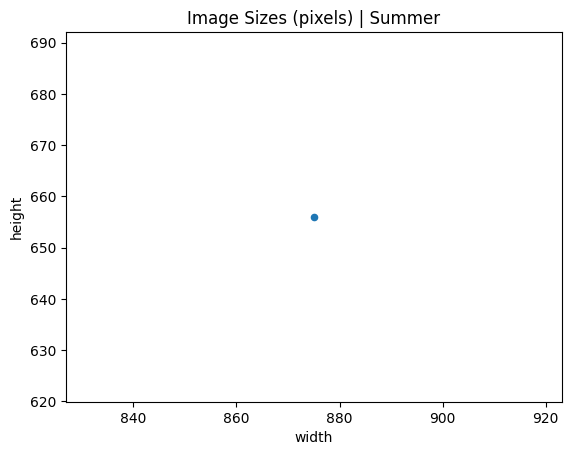

In [20]:
for n,d in directories.items():
  filepath = d
  filelist = [filepath + f for f in os.listdir(filepath)]
  print(len(filelist))
  dims = bag.from_sequence(filelist).map(get_dims)
  with diagnostics.ProgressBar():
    dims = dims.compute()
    dim_df = pd.DataFrame(dims, columns=['height', 'width'])
    sizes = dim_df.groupby(['height', 'width']).size().reset_index().rename(columns={0:'count'})
    sizes.plot.scatter(x='width', y='height');
    plt.title('Image Sizes (pixels) | {}'.format(n))

# **Scolograms**

In [90]:

def plot_samples(dir, label):
  from tensorflow.keras.preprocessing import image

  fig = plt.figure(figsize = (8,6))
  filelist = [filepath + f for f in os.listdir(dir)]
  files = np.random.choice(filelist, 6, replace = False)
  plt.title(label)
  plt.axis('off')

  for i in range(6):
      ax = fig.add_subplot(2, 3, i+1)
      fn = image.load_img(files[i], target_size = (100,100))
      plt.imshow(fn)
      plt.axis('off')
  plt.show()

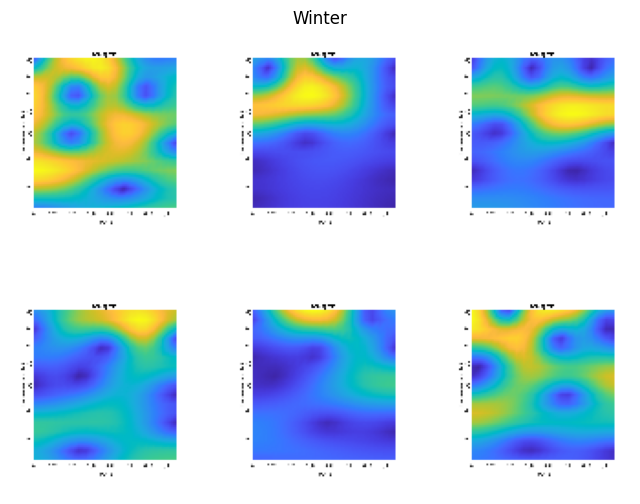

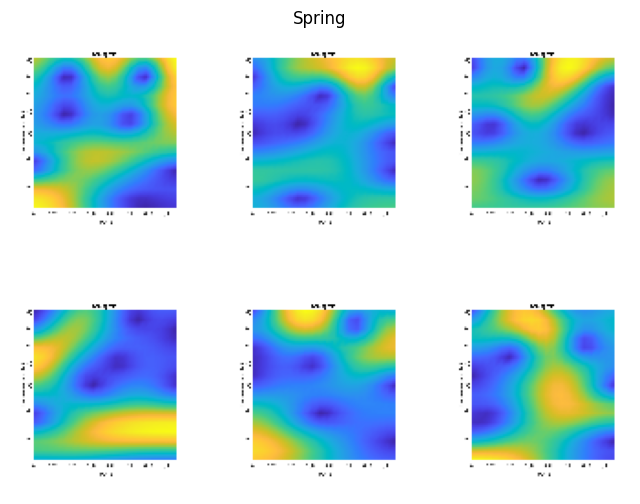

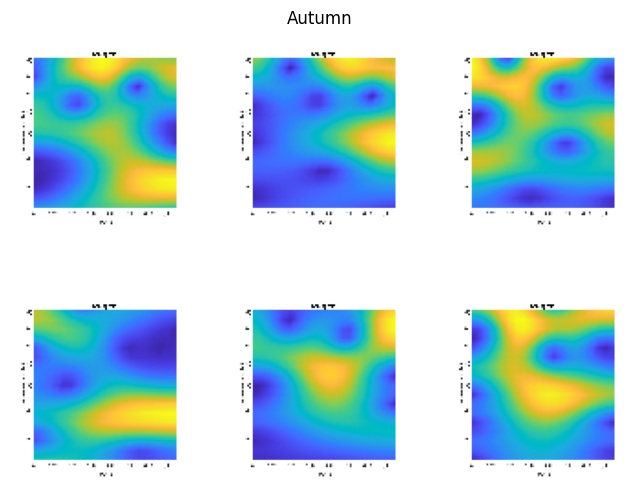

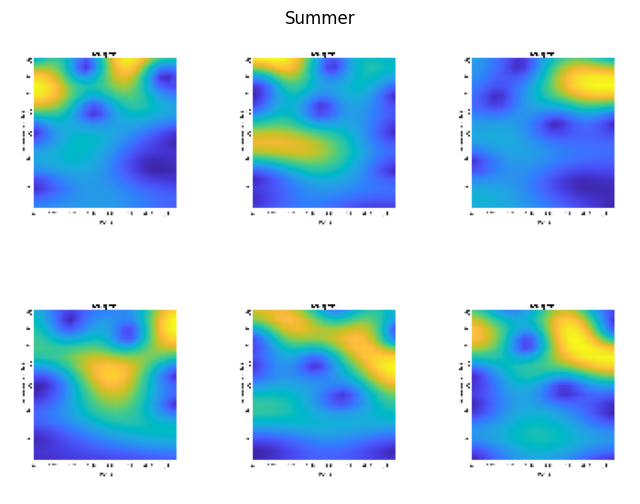

In [137]:
for n,dir in directories.items():
  plot_samples(d,n)

In [142]:
import PIL.Image

def cs_images(path,img_shape, classes):
    imag = []
    label = []
    for i in classes:
        l1 = os.listdir(path+'/'+i)
        for j in l1:
            img = PIL.Image.open(path+'/'+i+'/'+j)
            img = img.resize(size = (img_shape[0], img_shape[0]))
            img = img.convert('RGB')
            #img = img.convert('L')
            #img = img.reshape(50,50,1)
            #img = img.flatten()
            img = cv2.imread(path+'/'+i+'/'+j)
            img = cv2.resize(img,(img_shape[0],img_shape[1]),3)
            #img = np.array(img).reshape(img_shape)
            #img = img.reshape(img_shape)
            imag.append(img)
            label.append(classes.index(i))
            del(img)
    # %matplotlib inline 
    # plt.figure(figsize=(10, 10))
    # for i in range(20):
    #     plt.subplot(5,4,i+1)
    #     plt.imshow(imag[i])
    #     plt.axis('off')
    # plt.show()
    return np.array(imag),label

In [143]:
IMG_SIZE = 224

In [144]:
x,y = cs_images(data_path,(IMG_SIZE, IMG_SIZE, 1),classes)

In [145]:
y = pd.Series(y)

In [146]:
x_train,x_test,y_train,y_test = train_test_split(x,y,
                                                 test_size = 0.2,
                                                 random_state = 12,
                                                 shuffle = True)

In [147]:
x_train.shape

(273, 224, 224, 3)

In [148]:
y_train[:10]

11     0
101    1
293    3
37     0
236    2
144    1
3      0
333    3
243    2
14     0
dtype: int64

In [149]:
y_train.shape

(273,)

In [150]:
x_test.shape

(69, 224, 224, 3)

In [151]:
y_test.shape

(69,)

In [152]:
IMG_SIZE = 224

# VGG

In [153]:
from glob import glob 
from tensorflow.keras.layers import Lambda
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [154]:

IMAGE_SIZE = [224, 224] 

In [155]:
#Create a VGG16 model, and removing the last layer that is classifying 1000 images. This will be replaced with images classes we have. 
#vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False) #Training with Imagenet weights
# Use this line for VGG19 network. Create a VGG19 model, and removing the last layer that is classifying 1000 images. This will be replaced with images classes we have. 


vgg = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
# This sets the base that the layers are not trainable. If we'd want to train the layers with custom data, these two lines can be ommitted. 
for layer in vgg.layers:
  layer.trainable = False

x = Flatten()(vgg.output) #Output obtained on vgg16 is now flattened. 
x = Dropout(0.3)(x)
x = Dense(30, activation='relu')(x)
prediction = Dense(len(classes), activation='softmax')(x) # We have 5 classes, and so, the prediction is being done on len(folders) - 5 classes
#Creating model object 
model = Model(inputs=vgg.input, outputs=prediction)
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [156]:
base_model = VGG19(input_shape=(IMG_SIZE,IMG_SIZE,3), include_top=False, weights='imagenet')
# Set all layers to non-trainable
for layer in base_model.layers:
    layer.trainable = False
# Set the last vgg block to trainable
base_model.layers[-2].trainable = True
base_model.layers[-3].trainable = True
base_model.layers[-4].trainable = True

model = Sequential()
model.add(Input(shape=(IMG_SIZE,IMG_SIZE,3)))
model.add(base_model)
model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(len(classes), activation='softmax'))

In [157]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 flatten_9 (Flatten)         (None, 25088)             0         
                                                                 
 dropout_13 (Dropout)        (None, 25088)             0         
                                                                 
 dense_18 (Dense)            (None, 128)               3211392   
                                                                 
 dropout_14 (Dropout)        (None, 128)               0         
                                                                 
 dense_19 (Dense)            (None, 4)                 516       
                                                                 
Total params: 23,236,292
Trainable params: 10,291,332


In [158]:
#opt = keras.optimizers.Adam(learning_rate=0.01)
opt = tf.keras.optimizers.experimental.SGD(0.01, momentum=0.01, clipnorm = 1)
#Compile the model 
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer= opt, 
              metrics=['sparse_categorical_accuracy']) 

In [159]:
history = model.fit(x_train,
                    y_train,
                    epochs= 15,
                    validation_data = (x_test,y_test),
                    verbose = 1,
                    #callbacks = [es],
                    batch_size=32)

Epoch 1/15
9/9 [==============================] - 4s 274ms/step - loss: 8.9539 - sparse_categorical_accuracy: 0.2967 - val_loss: 4.7156 - val_sparse_categorical_accuracy: 0.2029
Epoch 2/15
9/9 [==============================] - 2s 242ms/step - loss: 4.9332 - sparse_categorical_accuracy: 0.2527 - val_loss: 2.7921 - val_sparse_categorical_accuracy: 0.2754
Epoch 3/15
9/9 [==============================] - 2s 203ms/step - loss: 2.6586 - sparse_categorical_accuracy: 0.3260 - val_loss: 2.4290 - val_sparse_categorical_accuracy: 0.2754
Epoch 4/15
9/9 [==============================] - 2s 243ms/step - loss: 1.9400 - sparse_categorical_accuracy: 0.3260 - val_loss: 1.8637 - val_sparse_categorical_accuracy: 0.1884
Epoch 5/15
9/9 [==============================] - 2s 244ms/step - loss: 1.5849 - sparse_categorical_accuracy: 0.3993 - val_loss: 1.8142 - val_sparse_categorical_accuracy: 0.2464
Epoch 6/15
9/9 [==============================] - 2s 248ms/step - loss: 1.3718 - sparse_categorical_accuracy: 

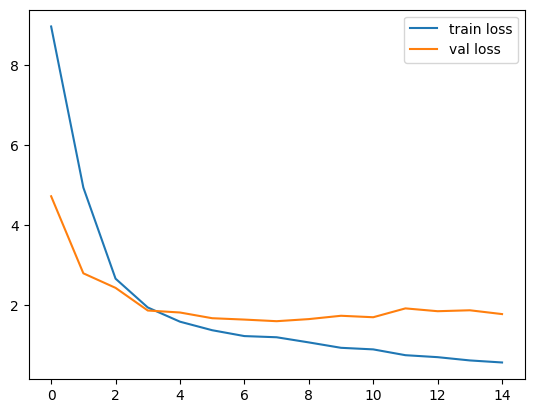

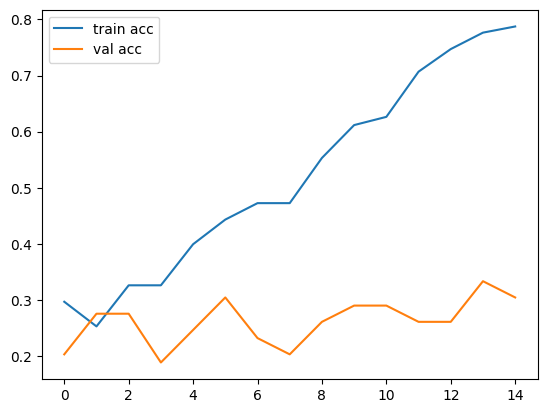

In [160]:
# loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
 
 # accuracies
plt.plot(history.history['sparse_categorical_accuracy'], label='train acc')
plt.plot(history.history['val_sparse_categorical_accuracy'], label='val acc')
plt.legend()
plt.show()

In [161]:
y_pred = np.argmax(model.predict(x_test),axis=1)

3/3 [==============================] - 0s 139ms/step


In [162]:
y_pred[0:5]

array([0, 1, 0, 3, 1])

In [163]:
list(y_test[0:5])

[2, 1, 1, 2, 3]

In [164]:
model.evaluate(x_test,y_test)

3/3 [==============================] - 0s 97ms/step - loss: 1.7746 - sparse_categorical_accuracy: 0.3043


[1.7745857238769531, 0.30434781312942505]

In [165]:
print(classes)
# print(y_test[:25], '\n')
# print(y_pred[:25], '\n')

# predict = []
# for i in range(3000): #len(y_pred)
#   predict.append(np.argmax(y_pred[i]))

# print(predict[:25], '\n')

cm = confusion_matrix(y_test, y_pred)
print(cm, '\n')

zol = zero_one_loss(y_test, y_pred, normalize = False)
print(zol, '\n')

cr = classification_report(y_test, y_pred)
print(cr)

['Winter', 'Summer', 'Spring', 'Autumn']
[[11  4  2  3]
 [ 3  5  6  2]
 [ 7  0  3  4]
 [12  3  2  2]] 

48 

              precision    recall  f1-score   support

           0       0.33      0.55      0.42        20
           1       0.42      0.31      0.36        16
           2       0.23      0.21      0.22        14
           3       0.18      0.11      0.13        19

    accuracy                           0.30        69
   macro avg       0.29      0.30      0.28        69
weighted avg       0.29      0.30      0.28        69



<Figure size 500x500 with 0 Axes>

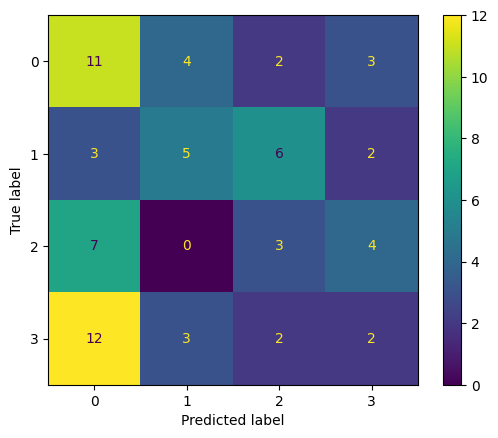

In [166]:
plt.figure(figsize = (5,5))
ConfusionMatrixDisplay(cm).plot()
plt.show()